# Задание

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install plotly

In [ ]:
pip install country_converter

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import country_converter as coco

In [2]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0]
data.drop(0, inplace=True)


## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

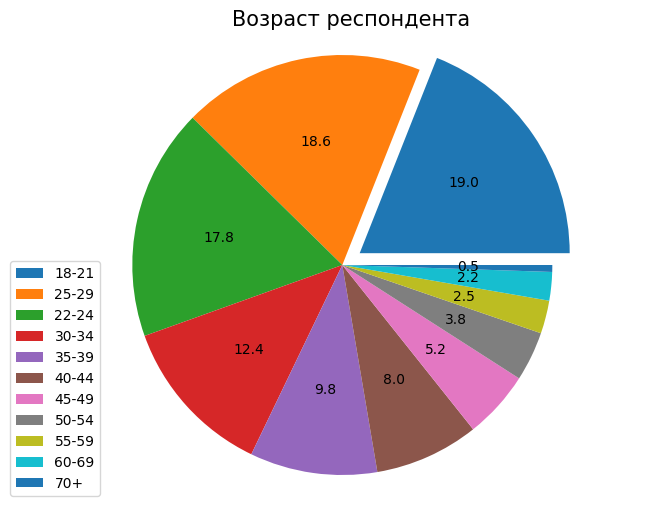

In [3]:
def circle_diagram(labels, sizes):
        explodes = list()
        for size in sizes:
                explodes.append(0.1) if max(sizes) == size else explodes.append(0)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title("Возраст респондента", fontsize=15)
        wedges, texts, autotexts = ax.pie(sizes,
                                        explode=explodes,
                                        labels=None, autopct='%1.1f', shadow=False, startangle=0)
        ax.legend(wedges, labels,
                title=None,
                loc=(-0.05, 0)
                )
        ax.axis('equal')
        plt.show()

dict_values_age = (data['Q2'].loc[1:].value_counts()).to_dict()
labels = list(dict_values_age.keys())
sizes = list(dict_values_age.values())
circle_diagram(labels, sizes)

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

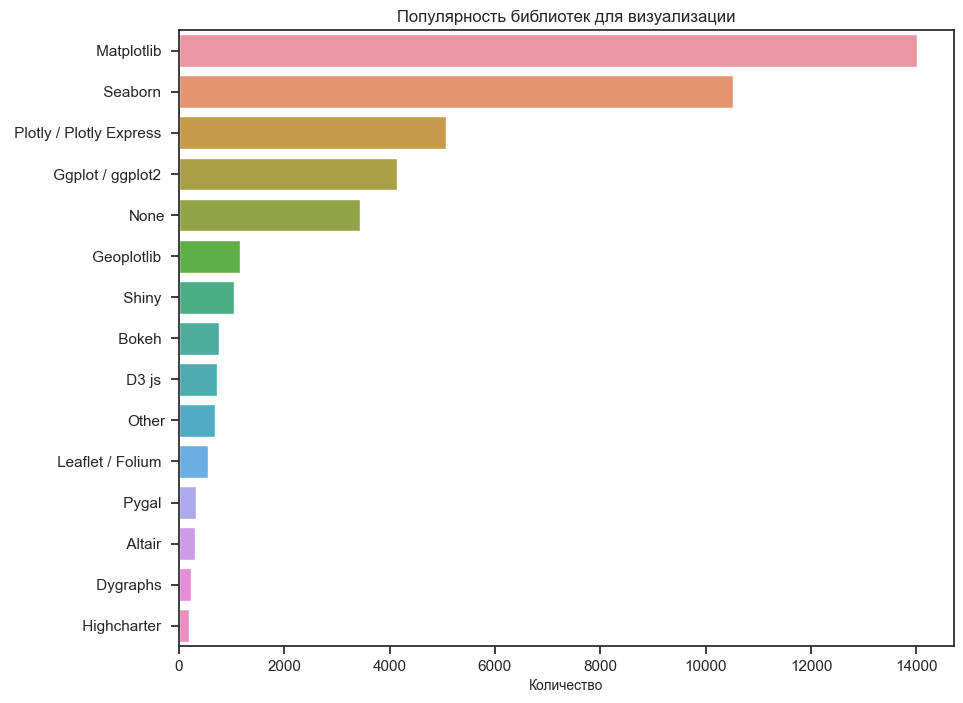

In [4]:
def barplot_diagram(labels, sizes):
       sns.set_theme(style="ticks")
       f, ax = plt.subplots(figsize=(10, 8))
       ax.set_title("Популярность библиотек для визуализации", fontsize=12, loc=('center'))
       ax.set_xlabel("Количество", fontsize=10, loc=('center'))
       sns.set_color_codes("pastel")
       sns.barplot(x=sizes, y=labels)
       ax.grid(False)
       plt.show()

q15_columns = [col for col in data.columns if col.startswith('Q15')]
dict_values_lib = data[q15_columns].loc[1:].melt().dropna()['value'].value_counts().to_dict()
labels = list(dict_values_lib.keys())
sizes = list(dict_values_lib.values())
barplot_diagram(labels, sizes)


## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

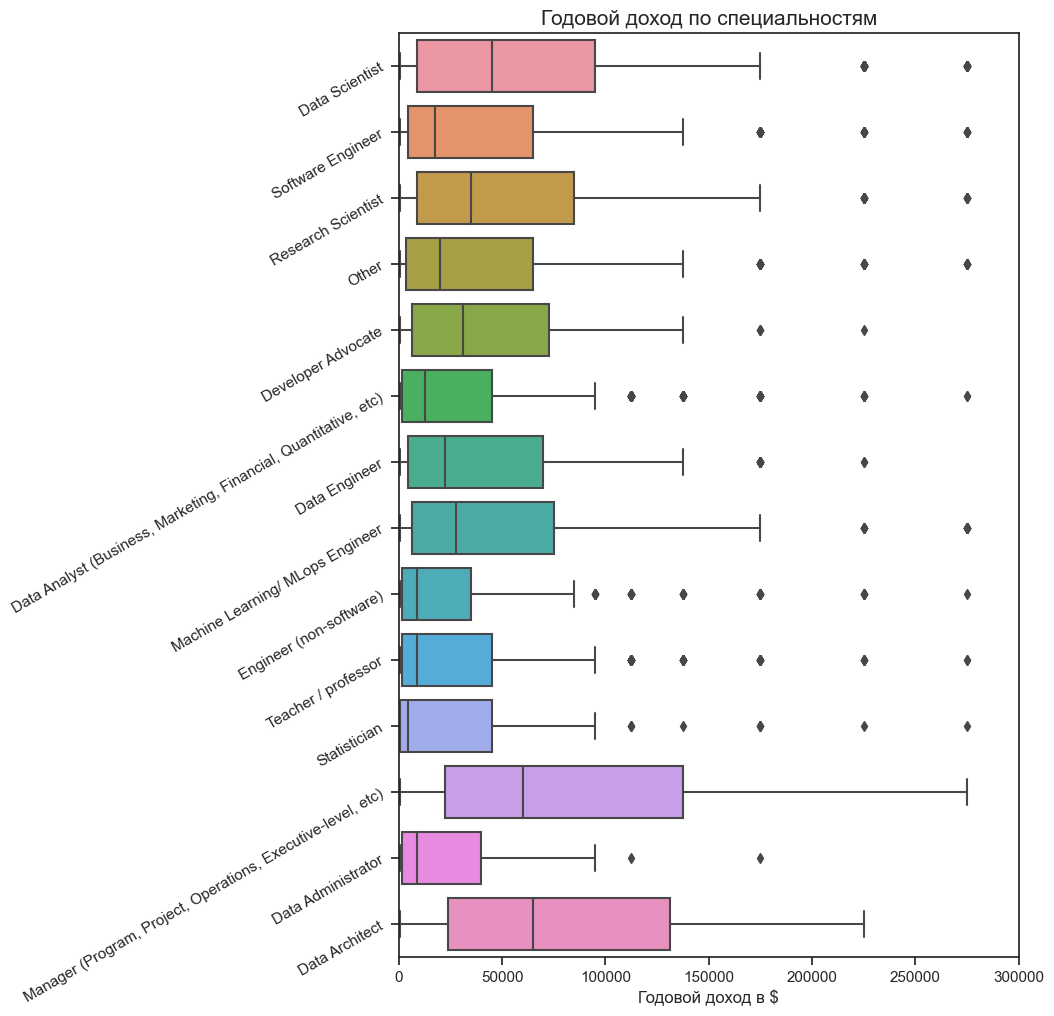

In [7]:
def get_salary(indexes):
    salaries = []
    for index in indexes:
        index = index.replace('$', '')
        index = index.replace(',', '')
        index = index.replace('>', '')
        splitted = index.split('-')
        if len(splitted) > 1:
            mean = (int(splitted[0]) + (int(splitted[1])) + 1) / 2
        else:
            mean = splitted[0]
        salaries.append(mean)
    return np.array(salaries, dtype=int)

def boxplot_diagram(labels, big_lst):
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_title("Годовой доход по специальностям", loc=('center'), fontsize=15)
    sns.boxplot(data=big_lst[0::1], ax=ax, orient='h',)
    ax.set_yticklabels(labels)
    ax.set(xlim=(0, 3e5))
    plt.xticks(rotation=0)
    plt.yticks(rotation=30) # - вывод на экран
    plt.xlabel("Годовой доход в $")

labels = data['Q23'].loc[1:].dropna().unique()
labels = [x for x in labels if x != 'Currently not employed']
big_lst = list()
for label in labels:
    big_lst.append(get_salary(data[data['Q23'] == label]['Q29'].dropna().to_list()))
boxplot_diagram(labels, big_lst)

## Задание 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [8]:
def get_age(name):
    dd = data[['Q2', 'Q23']].dropna()
    dict_ages = dd[dd["Q23"].str.contains(name)]['Q2'].value_counts().to_dict()
    return dict(sorted(dict_ages.items(), key=lambda item: item[0], reverse=False))

name_profession = ['Data Administrator', 'Data Analyst', 'Data Engineer',
            'Data Scientist', 'Engineer', 'MLops Engineer',
            'Research Scientist', 'Software Engineer', 'Data Architect']

tmp = []
for i in name_profession:
    style_name = "<span style='font-weight:bold; font-style:italic'>" + i + "</span>"
    tmp.append(style_name)

fig = make_subplots(rows=3, cols=3, subplot_titles=tmp)
i = 0
for name in name_profession:
    age_values = get_age(name)
    t = go.Bar(x=list(age_values.keys()), y=list(age_values.values()), name=name)
    m = fig.add_trace(t, row=(i//3) + 1 ,col=  (i)%3 + 1)
    i += 1
fig.update_layout(title='Распределение возрастов по специальностям',height=600, width=1000)
fig.show()

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [9]:

dict_countries = data['Q4'][(data['Q4'].str.contains('I do not wish to disclose my location') == False) & (data['Q4'].str.contains('Other') == False)].value_counts().to_dict()
countries = dict_countries.keys()
count = dict_countries.values()
iso_alpha_2 = coco.convert(names=countries, to='ISO3')
df = pd.DataFrame({
        'Country': countries,
        'Count': count,
        'iso_alpha' : iso_alpha_2
    })
fig = go.Figure(data=go.Choropleth(
    locations = df['iso_alpha'],
    z = df['Count'],
    text = df['Country'],
    colorscale = 'Magma',
    autocolorscale=False,
    zmax=1000, zmin=0,
    marker_line_width=0.5,
    colorbar_title = 'Количество респондентов',
    colorbar=dict(tickmode='array',ticks='outside'),
))
fig = go.Figure(data=fig,)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,)
fig.update_layout(
    title={
        'text': "<span style='>" + 'Карта мира' + "</span>", # можно менять шрифт текста тут
        'y':0.95, # задаем вертикальное положение заголовка
        'x':0.5, # задаем горизонтальное положение заголовка
        'xanchor': 'center', # задаем центрирование заголовка по горизонтали
        'yanchor': 'top', # задаем положение заголовка относительно верхней границы
        'font': {
                'family': 'Arial', # можно настроить шрифт
                'size': 20,
                'color': 'black',
            }
    },
)
fig.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись ими со своими одногруппниками.